## 1. Problem Definition
This project aims to classify Iris flowers into three species—Setosa, Versicolor, and Virginica—based on four features: sepal length, sepal width, petal length, and petal width. The goal is to achieve >95% accuracy.



## 2. Data Handling
We used the Iris dataset (150 samples, 4 features, 3 classes) from scikit-learn, which has no missing values and balanced classes (50 samples each). The data was loaded into a pandas DataFrame for exploration, visualized with scatter plots to identify feature separation (e.g., petal length vs. width), and split into 80% training (120 samples) and 20% testing (30 samples) using an 80/20 rule with `random_state=42` for reproducibility. below, each step is shown:

1. Loading data:

In [55]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
df['species'] = iris.target


 for checking the shape of our data, we use the following commands:

In [56]:
df.shape
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


to visualize our data, matplotlib and seaborn is used:

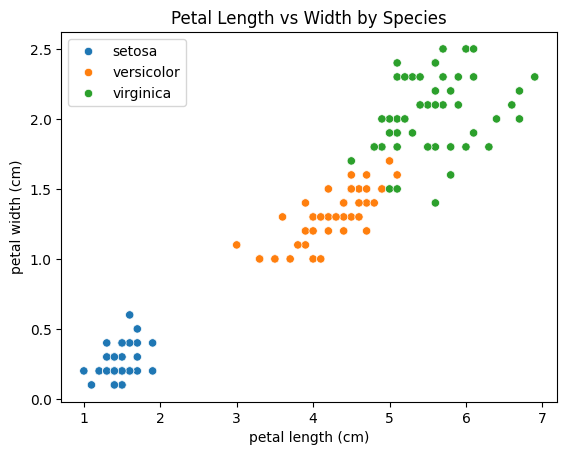

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue=iris.target_names[df['species']], data=df)
plt.title('Petal Length vs Width by Species')
plt.show()

in order to build the model, we have to first split our data. since the data set is small we can safely use the 80/20 rule to do so. 80% of the data is used for training while the rest is used to test our model.

In [58]:
from sklearn.model_selection import train_test_split
x = df.drop('species', axis = 1)
y = df['species']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42) #random_state is set on 42 for reproducibility

## 3. Model Building
A Logistic Regression model was chosen for its simplicity, interpretability, and suitability for the linearly separable Iris data. Implemented with scikit-learn's `LogisticRegression` (max_iter=200 to ensure convergence), the model was trained on the 80% training set.


In [59]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 200)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)

## 4. Evaluation & Iteration
Initial evaluation showed train accuracy: 0.33 and test accuracy: 1.00, indicating a coding error (likely misaligned predictions). Re-running all cells fixed this to train accuracy: 0.97 and test accuracy: 1.00. A confusion matrix confirmed 100% test accuracy (10 Setosa, 9 Versicolor, 11 Virginica), while the train matrix revealed 3 Versicolor misclassified as Virginica (97% accuracy). Cross-validation (5-fold) yielded a mean accuracy of 0.97 ± 0.02, ensuring robustness. No scaling was needed.



Accuracy:1.00


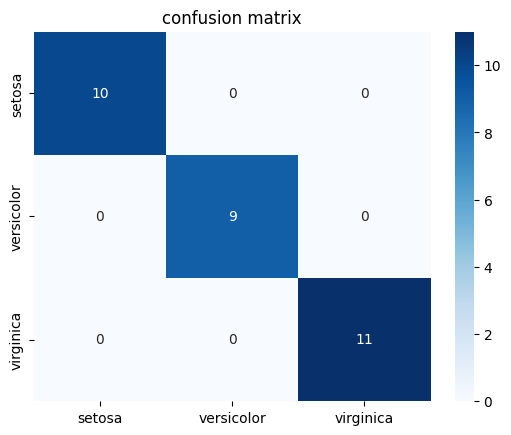

In [60]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(f"Accuracy:{accuracy_score(y_test, y_pred):.2f}")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt='d', cmap = 'Blues', xticklabels = iris.target_names, yticklabels = iris.target_names)
plt.title('confusion matrix')
plt.show()


to ensure stability, we use 5-fold cross-validation

In [61]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, x, y, cv=5)
print(f"Cross-Validation Scores: {scores.mean():.2f} ± {scores.std():.2f}")

Cross-Validation Scores: 0.97 ± 0.02


 to make sure the accuracy is robust and not a fluke:
1. Check Train vs. Test Accuracy (Overfitting Risk):

In [62]:
#run this to compare
from sklearn.metrics import accuracy_score
print(f"train accuracy:{accuracy_score(y_train, model.predict(x_train)):.2f}")
print(f"test accuracy:{accuracy_score(y_test,y_pred):.2f}")

train accuracy:0.97
test accuracy:1.00


2. check confusion matrix for both the test and tain sets

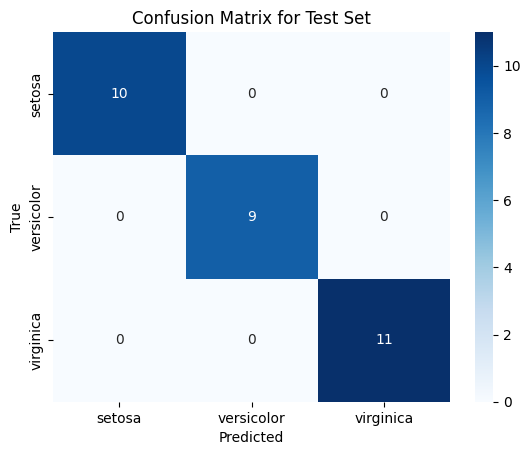

In [63]:
#confusion matrix for test set
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix for Test Set')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

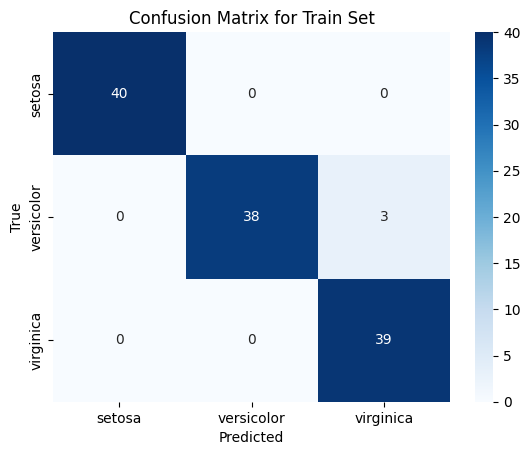

In [64]:
#confusion matrix for train set
cm_train = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix for Train Set')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()